In [298]:
#Exercise-1， 
#Question 1:

import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler




In [299]:
my_df = pd.read_csv("./Titanic_full.csv") #load pre-processing data

In [300]:
my_df.head(10)   #check data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [301]:
my_df.tail()
my_df.shape

(1309, 12)

In [302]:
def child_age(x):   #classifed by age
    if x < 18:
        return "Child"
    elif x>=18:
        return "Adult"
    else:
        return "unknown"

my_df["Status"] = my_df["Age"].apply(child_age)

my_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [303]:
sorted_df = my_df.sort_values(by = ["Age","Status",],inplace = False)  #sort data and found some babies on the ship
sorted_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
1245,1246,0,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,Child
1092,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,Child
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Child
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Child
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Child


In [304]:
my_df["Age"].describe()   #check the age distriubtion

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [305]:
my_df["Cabin"].describe()  #there are lots of missing data in this column

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [306]:
# using F and M to replace female and male
my_df_abbrSexF = my_df.replace(to_replace = "female",
                        value = "F",inplace = False)

my_df_abbrSexF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [307]:
my_df_abbrSex = my_df_abbrSexF.replace(to_replace = "male",
                        value = "M",inplace = False)

my_df_abbrSex.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Adult


Text(0.5, 0, 'Age')

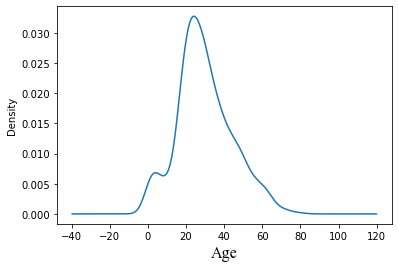

In [308]:
# check the age distribution , most people in young age.
my_df_abbrSex["Age"].plot(x = "Age", kind = "density")

plt.xlabel('Age', fontdict={'family' : 'Times New Roman', 'size'   : 16})

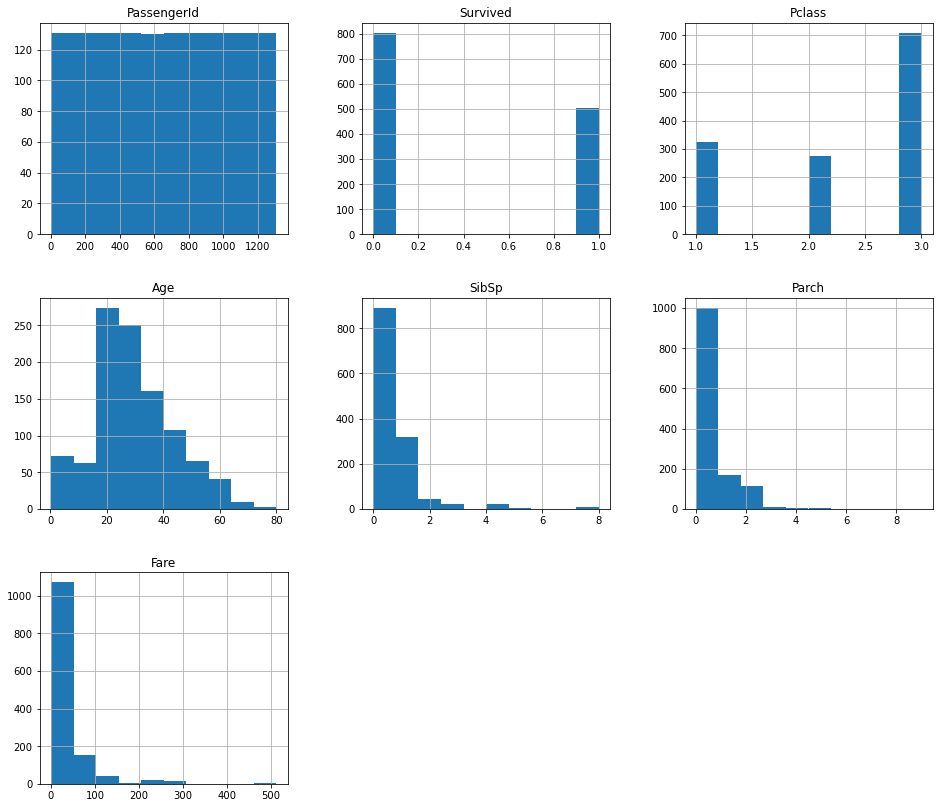

In [309]:
#using plot to check each column data in order to preprocessing
my_df.hist(figsize=(16,14))
plt.show()

Text(0.5, 0, 'Age')

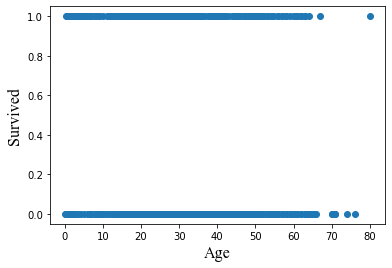

In [310]:
# using scatter figure to find which age person have large chance to survive. 
plt.scatter(my_df["Age"], my_df["Survived"], label = 'RealValue')
plt.ylabel('Survived', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xlabel('Age', fontdict={'family' : 'Times New Roman', 'size'   : 16})

In [311]:
#define a method to split train and test sets

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(my_df,1100)

print(mydf_train_valid.shape,mydf_test.shape)

(1100, 13) (209, 13)


<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

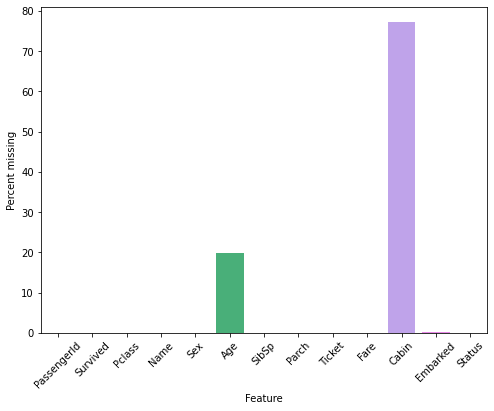

In [312]:
#double check with column is useless
null_vals = mydf_train_valid.isnull().sum()/len(mydf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [313]:
#delete useless column in order to dimension reduction
mydf_train_valid_2 = mydf_train_valid.drop("Cabin",axis = 1)
print(mydf_train_valid_2.shape)
mydf_train_valid_2.head()

(1100, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [314]:
# check the data set
mydf_train_valid_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1100 non-null   int64  
 1   Survived     1100 non-null   int64  
 2   Pclass       1100 non-null   int64  
 3   Name         1100 non-null   object 
 4   Sex          1100 non-null   object 
 5   Age          881 non-null    float64
 6   SibSp        1100 non-null   int64  
 7   Parch        1100 non-null   int64  
 8   Ticket       1100 non-null   object 
 9   Fare         1099 non-null   float64
 10  Embarked     1098 non-null   object 
 11  Status       1100 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 103.2+ KB


In [315]:
# Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [316]:
mydf_train_valid_3 = str_to_cat(mydf_train_valid_2)
mydf_train_valid_3.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult


In [317]:
print(mydf_train_valid_3.Embarked.cat.categories)
print(mydf_train_valid_3.Sex.cat.categories)

Index(['C', 'Q', 'S'], dtype='object')
Index(['female', 'male'], dtype='object')


In [318]:
mydf_train_valid_3.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult


In [319]:
# Define impute method 

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [320]:
mydf_train_valid_4,my_table = mydf_preprocessor(mydf_train_valid_3,null_table = None)

In [321]:
mydf_train_valid_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,Age_na,Fare_na
0,1,0,3,135,2,22.0,1,0,629,7.2500,3,1,False,False
1,2,1,1,245,1,38.0,1,0,713,71.2833,1,1,False,False
2,3,1,3,442,1,26.0,0,0,799,7.9250,3,1,False,False
3,4,1,1,354,1,35.0,1,0,56,53.1000,3,1,False,False
4,5,0,3,19,2,35.0,0,0,565,8.0500,3,1,False,False


In [322]:
my_table

{'Age': 28.0, 'Fare': 14.4583}

In [323]:
# decide target data and attributes data
Y = mydf_train_valid_4["Survived"]
X = mydf_train_valid_4.drop(["Survived"],axis = 1)

print(X.shape,Y.shape)

(1100, 13) (1100,)


In [324]:
 # prepare to scale the continuous variables into the range between 0 and 1.

X_cat = X[['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'Age_na', 'Fare_na', 'Status']]
X_con = X.drop(X_cat,axis = 1)
print(X_cat.shape,X_con.shape)

(1100, 11) (1100, 2)


In [325]:
X_con.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [326]:
#data standardization
scaler = StandardScaler().fit(X_con)

In [327]:
X_con_sc = pd.DataFrame(scaler.transform(X_con))

In [328]:
X_con_sc.head()

,0,1
0,-0.574896,-0.502155
1,0.659705,0.747957
2,-0.266246,-0.488977
3,0.428217,0.392967
4,0.428217,-0.486537


In [329]:
X_con_sc.columns = ["Age","Fare"]

In [330]:
df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full.head(2)

(1100, 13)


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Status,Age,Fare
0,1,3,135,2,1,0,629,3,False,False,1,-0.574896,-0.502155
1,2,1,245,1,1,0,713,1,False,False,1,0.659705,0.747957


In [331]:
# decide train set and test set
X_train,X_valid = mydf_splitter(X_full,900)
Y_train,Y_valid = mydf_splitter(Y,900)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(900, 13) (200, 13) (900,) (200,)


In [332]:
# to test when k=1 the accuracy of prediction
my_knn_model = KNeighborsClassifier(n_neighbors = 1,weights = 'uniform')
my_knn_model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=1)

In [333]:
Y_pred = my_knn_model.predict(X_valid)

<AxesSubplot:>

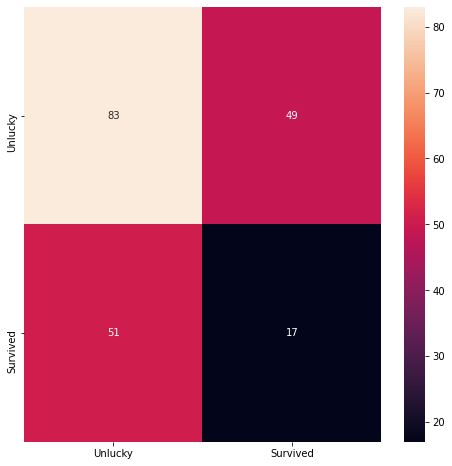

In [334]:
# using chart to show the accuracy and recall rate
my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

In [335]:

print(accuracy_score(Y_valid,Y_pred))



0.5


In [336]:
#using loops to find best hyper-parameter k
for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    
    knn_model.fit(X_train, Y_train)
    Y_pred = knn_model.predict(X_train)
    Y_pred_test = knn_model.predict(X_valid)
    accuracy_score(Y_valid,Y_pred_test)
    
    
    print ("when k=",i,  "the test set with accuracy ",accuracy_score(Y_valid,Y_pred_test) )

when k= 1 the test set with accuracy  0.5
when k= 2 the test set with accuracy  0.58
when k= 3 the test set with accuracy  0.495
when k= 4 the test set with accuracy  0.565
when k= 5 the test set with accuracy  0.54
when k= 6 the test set with accuracy  0.56
when k= 7 the test set with accuracy  0.53
when k= 8 the test set with accuracy  0.57
when k= 9 the test set with accuracy  0.555
when k= 10 the test set with accuracy  0.595
when k= 11 the test set with accuracy  0.575
when k= 12 the test set with accuracy  0.58
when k= 13 the test set with accuracy  0.565
when k= 14 the test set with accuracy  0.6
when k= 15 the test set with accuracy  0.58
when k= 16 the test set with accuracy  0.59
when k= 17 the test set with accuracy  0.56
when k= 18 the test set with accuracy  0.58
when k= 19 the test set with accuracy  0.57
when k= 20 the test set with accuracy  0.57
when k= 21 the test set with accuracy  0.56
when k= 22 the test set with accuracy  0.575
when k= 23 the test set with accurac

when k= 10, the test set with highest accuracy  0.595

In [337]:
# try to use another method, grid search, to find proper k value.
# 5-foldcross validation in order to increase model precision
estimator = KNeighborsClassifier()
param_grid={"n_neighbors":[1,3,5,7,9,10,11]}
estimator= GridSearchCV(estimator, param_grid= param_grid, cv=5)
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 10, 11]})

In [338]:
score_ret=estimator.score(X_valid,Y_valid)
print("the score of test:\n",score_ret)

the score of test:
 0.595


In [297]:
# print the result of grid search 
print("best score:\n", estimator.best_score_)
print("best estimator:/n",estimator.best_estimator_)
print("best estimator cv results:/n", estimator.cv_results_)

best score:
 0.5944444444444444
best estimator:/n KNeighborsClassifier(n_neighbors=10)
best estimator cv results:/n {'mean_fit_time': array([0.00592103, 0.00340099, 0.00320125, 0.00320096, 0.00360103,
       0.00340161, 0.00340056]), 'std_fit_time': array([0.00389462, 0.00049002, 0.00039959, 0.00040009, 0.00048945,
       0.00049097, 0.00048969]), 'mean_score_time': array([0.00620275, 0.00600095, 0.00620084, 0.00600066, 0.00560079,
       0.00600061, 0.0062016 ]), 'std_score_time': array([7.47614844e-04, 6.32259000e-04, 3.99685390e-04, 4.67203091e-07,
       4.89473624e-04, 8.20381667e-07, 3.99780529e-04]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 10, 11],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}], 'split0_test_score': array([0.6       , 0.605555

In [344]:
# save model!
!mkdir knn_model2



In [346]:

ls knn_model

 驱动器 C 中的卷是 Windows-SSD
 卷的序列号是 C0CE-313C

 C:\Users\1\Downloads\python assigment\knn_model 的目录

2021/02/28  23:41    <DIR>          .
2021/02/28  23:41    <DIR>          ..
               0 个文件              0 字节
               2 个目录 39,583,379,456 可用字节


Question 2: 
(A) What are some considerations while using K-NN on geo-coordinates data?

When using K-NN on geo-coordinates data, we should be clear that the most common way to calculate distances using latitude and longitude is the haversine formula, which is used to measure distances on a sphere, rather than using Euclidean distance. What is more, we should decide what type of data can be considered as features or attributes and labeled longitude and latitude, such as cities or places, which are unbalanced distributions, and will obviously affect the prediction accuracy. Additionally, we should consider that the city boundary is varied, and the nearest distance maybe not the right answer. Along with the increase of the K, it will also make boundaries between classes less distinct.

Last but not least, the latitude and longitude value is not continuous. For instance, The 0° parallel of latitude is designated the Equator, which divides the globe into Northern and Southern Hemispheres. If the target is close to the Equator, some nearest neighbors are located in North Hemispheres and some in Southern Hemispheres. It will lead to hard to get average value as predicting the result. To longitude, the prime meridian determines the proper Eastern and Western Hemispheres and the antipodal meridian of Greenwich is both 180°W and 180°E. If the target is close to prime meridian, some nearest neighbors maybe locate in W Hemispheres，and others in E Hemispheres. It will lead to hard to get average value as predicting the result.

(B) Is KNN a parametric algorithm and if so, what are its implications?

K-NN is a non-parametric algorithm, which means it does not make any assumptions on underlying data. It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically. The non-parametric attributes of K-NN mean it cannot acquire better results by tuning key parameters except hyper-parameter k.

(C) Please list two disadvantages of using KNN learners. (with any luck this will help you in your DS interviews!).

The first disadvantage is that the accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance.

Secondly, it always needs to determine the value of K which may be complex sometimes. The computation cost is high because of calculating the distance between the data points for all the training samples. It is computationally intensive for large training sets. Using an approximate nearest neighbor search algorithm makes k-NN computationally tractable even for large data sets.